In [ ]:
!pip install streamlit torch torchaudio numpy librosa matplotlib pandas Pillow scikit-learn
!pip install pydub


In [1]:
import torch

# Check CUDA availability
if torch.cuda.is_available():
    print("CUDA is available. Device:", torch.cuda.get_device_name(0))
else:
    print("CUDA is not available. Using CPU.")


CUDA is available. Device: NVIDIA GeForce RTX 4050 Laptop GPU


In [5]:
import os

def get_all_audio_files(species_folder):
    """
    Recursively traverse species_folder and its subfolders to collect all .wav and .pkf file paths.
    """
    audio_files = []
    for root, dirs, files in os.walk(species_folder):
        for file in files:
            if file.lower().endswith(('.wav', '.pkf')):
                full_path = os.path.join(root, file)
                audio_files.append(full_path)
    return audio_files

# Example usage for each species folder:
species1_folder = "Cleaned Bat Echolocation calls of South India/Pipistrellus ceylonicus"
species2_folder = "Cleaned Bat Echolocation calls of South India/Rhinolophus indorouxii"

species1_files = get_all_audio_files(species1_folder)
species2_files = get_all_audio_files(species2_folder)

print(f"Total files in {species1_folder}: {len(species1_files)}")
print(f"Total files in {species2_folder}: {len(species2_files)}")


Total files in Cleaned Bat Echolocation calls of South India/Pipistrellus ceylonicus: 331
Total files in Cleaned Bat Echolocation calls of South India/Rhinolophus indorouxii: 1240


Total audio files found in 'Cleaned Bat Echolocation calls of South India': 5808
Loading file: Cleaned Bat Echolocation calls of South India\Chaerephon plicatus\IAF Hakimpet Aug 2022\20220730_020917_2_20220730020942.wav
Loaded .wav file.
Resampled waveform.


c:\Users\jambu\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


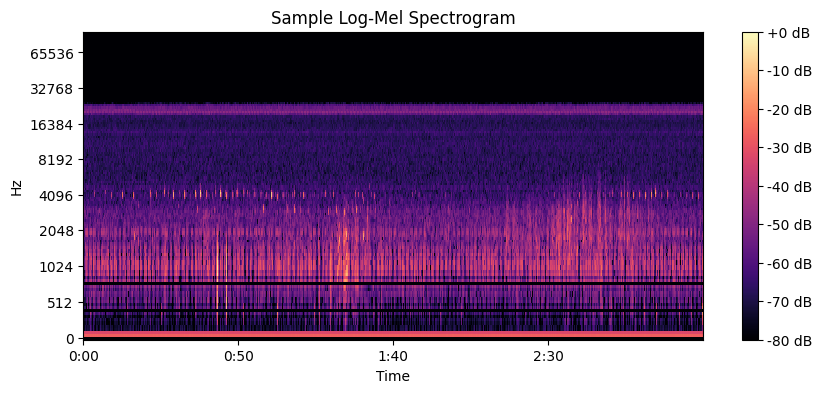

In [ ]:
import os
import glob
import pickle
import torchaudio
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

def load_audio(filepath, sr=192000):
    ext = os.path.splitext(filepath)[1].lower()
    print(f"Loading file: {filepath}")
    if ext == ".wav":
        waveform, original_sr = torchaudio.load(filepath)
        waveform = waveform.numpy()[0]  # Assuming single-channel
        print("Loaded .wav file.")
    elif ext == ".pkf":
        with open(filepath, "rb") as f:
            waveform = pickle.load(f)
        waveform = np.array(waveform, dtype=np.float32)
        print("Loaded .pkf file and converted to waveform.")
    else:
        raise ValueError("Unsupported file type")
    
    # Resample using librosa (if needed)
    waveform = librosa.resample(waveform, orig_sr=48000, target_sr=sr)
    print("Resampled waveform.")
    return waveform

def waveform_to_logmel(waveform, sr=192000, n_mels=128, n_fft=2048, hop_length=512):
    S = librosa.feature.melspectrogram(y=waveform, sr=sr, n_fft=n_fft,
                                       hop_length=hop_length, n_mels=n_mels)
    log_S = librosa.power_to_db(S, ref=np.max)
    return log_S

def get_all_audio_files(parent_folder):
    """
    Recursively traverse the parent_folder and return all .wav and .pkf file paths.
    """
    audio_files = []
    for root, dirs, files in os.walk(parent_folder):
        for file in files:
            if file.lower().endswith(('.wav', '.pkf')):
                full_path = os.path.join(root, file)
                audio_files.append(full_path)
    return audio_files

# Define the parent folder
parent_folder = "Cleaned Bat Echolocation calls of South India"

# Get all audio files (including those in child folders)
audio_files = get_all_audio_files(parent_folder)
print(f"Total audio files found in '{parent_folder}': {len(audio_files)}")

# Process each file (for demonstration, we just process and display a sample spectrogram)
if audio_files:
    # For example, process the first file in the list
    sample_wave = load_audio(audio_files[0])
    sample_spec = waveform_to_logmel(sample_wave)
    
    # Display the spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(sample_spec, sr=192000, hop_length=512, x_axis='time', y_axis='mel')
    plt.title("Sample Log-Mel Spectrogram")
    plt.colorbar(format='%+2.0f dB')
    plt.show()
else:
    print("No audio files found in the folder.")


Using WAV file: Cleaned Bat Echolocation calls of South India/Pipistrellus ceylonicus\Avani-Ganji Gunte- Oct 2021\20211015_125509_20211015125509.wav
Loading file: Cleaned Bat Echolocation calls of South India/Pipistrellus ceylonicus\Avani-Ganji Gunte- Oct 2021\20211015_125509_20211015125509.wav
Loaded .wav file.
Resampled waveform.


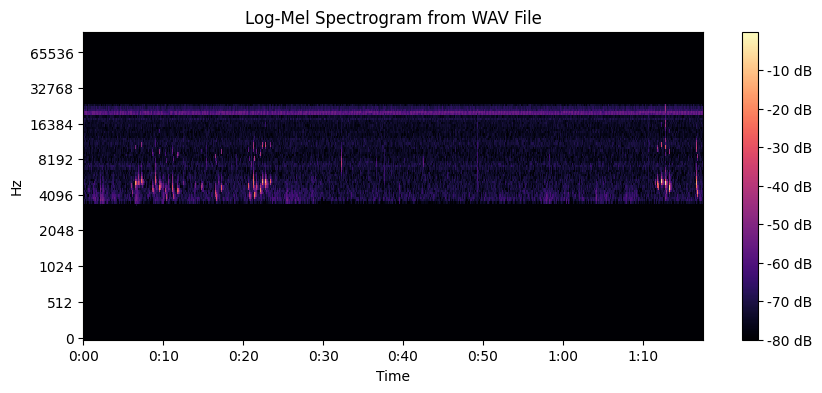

Using PKF file: Cleaned Bat Echolocation calls of South India/Pipistrellus ceylonicus\Avani-Ganji Gunte- Oct 2021\20211015_125509_20211015125509.pkf
Loading file: Cleaned Bat Echolocation calls of South India/Pipistrellus ceylonicus\Avani-Ganji Gunte- Oct 2021\20211015_125509_20211015125509.pkf
Pickle loading failed for Cleaned Bat Echolocation calls of South India/Pipistrellus ceylonicus\Avani-Ganji Gunte- Oct 2021\20211015_125509_20211015125509.pkf: invalid load key, 'k'.
Fallback: File header bytes: b'k$!\x00\xc5\xd68\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00'
Loaded .pkf file using fallback raw data method.
Resampled waveform.


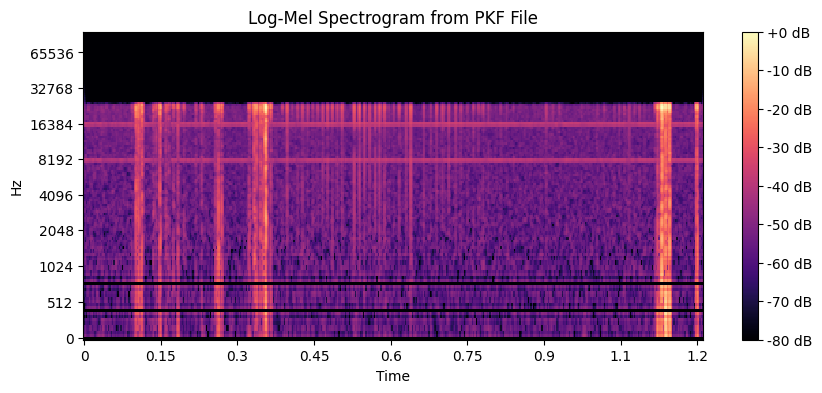

In [ ]:
import os
import glob
import pickle
import torchaudio
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

def load_audio(filepath, sr=192000):
    ext = os.path.splitext(filepath)[1].lower()
    print(f"Loading file: {filepath}")
    if ext == ".wav":
        waveform, original_sr = torchaudio.load(filepath)
        waveform = waveform.numpy()[0]  # Assuming single-channel
        print("Loaded .wav file.")
    elif ext == ".pkf":
        # First try pickle
        try:
            with open(filepath, "rb") as f:
                waveform = pickle.load(f)
            waveform = np.array(waveform, dtype=np.float32)
            print("Loaded .pkf file using pickle.")
        except Exception as e:
            print(f"Pickle loading failed for {filepath}: {e}")
            # Fallback: Read file as raw bytes, skip header (assumed 20 bytes)
            with open(filepath, "rb") as f:
                header = f.read(20)
                print("Fallback: File header bytes:", header)
                raw_data = f.read()  # Read the remaining bytes
            waveform = np.frombuffer(raw_data, dtype=np.float32)
            print("Loaded .pkf file using fallback raw data method.")
    else:
        raise ValueError("Unsupported file type")
    
    # Resample using librosa (if needed)
    waveform = librosa.resample(waveform, orig_sr=48000, target_sr=sr)
    print("Resampled waveform.")
    return waveform

def waveform_to_logmel(waveform, sr=192000, n_mels=128, n_fft=2048, hop_length=512):
    S = librosa.feature.melspectrogram(y=waveform, sr=sr, n_fft=n_fft,
                                       hop_length=hop_length, n_mels=n_mels)
    log_S = librosa.power_to_db(S, ref=np.max)
    return log_S

# For .wav file: recursively search within a species folder
folder_1 = "Cleaned Bat Echolocation calls of South India/Pipistrellus ceylonicus"
wav_files = glob.glob(os.path.join(folder_1, "**/*.wav"), recursive=True)
if wav_files:
    sample_wav = wav_files[0]
    print("Using WAV file:", sample_wav)
    waveform_wav = load_audio(sample_wav)
    spec_wav = waveform_to_logmel(waveform_wav)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spec_wav, sr=192000, hop_length=512, x_axis='time', y_axis='mel')
    plt.title("Log-Mel Spectrogram from WAV File")
    plt.colorbar(format='%+2.0f dB')
    plt.show()
else:
    print("No WAV files found in", folder_1)

# For .pkf file: recursively search within a species folder
pkf_files = glob.glob(os.path.join(folder_1, "**/*.pkf"), recursive=True)
if pkf_files:
    sample_pkf = pkf_files[0]
    print("Using PKF file:", sample_pkf)
    waveform_pkf = load_audio(sample_pkf)
    if waveform_pkf.size > 0:
        spec_pkf = waveform_to_logmel(waveform_pkf)
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(spec_pkf, sr=192000, hop_length=512, x_axis='time', y_axis='mel')
        plt.title("Log-Mel Spectrogram from PKF File")
        plt.colorbar(format='%+2.0f dB')
        plt.show()
    else:
        print("Skipping PKF file due to loading error.")
else:
    print("No PKF files found in", folder_1)


In [15]:
import torch
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split

# Custom Dataset for bat calls
class BatCallDataset(Dataset):
    def __init__(self, file_list, labels, sr=192000, n_mels=128, n_fft=2048, hop_length=512):
        self.file_list = file_list
        self.labels = labels
        self.sr = sr
        self.n_mels = n_mels
        self.n_fft = n_fft
        self.hop_length = hop_length
        
    def __len__(self):
        return len(self.file_list)
    
    def __getitem__(self, idx):
        filepath = self.file_list[idx]
        label = self.labels[idx]
        waveform = load_audio(filepath, sr=self.sr)
        spec = waveform_to_logmel(waveform, sr=self.sr, n_mels=self.n_mels, n_fft=self.n_fft, hop_length=self.hop_length)
        # Normalize spectrogram (zero-mean, unit variance)
        spec = (spec - np.mean(spec)) / (np.std(spec) + 1e-6)
        # Expand dims to match channel-first (1, mel, time)
        spec = np.expand_dims(spec, axis=0).astype(np.float32)
        return torch.tensor(spec), torch.tensor(label)

# Function to recursively collect audio files from a given folder
def get_all_audio_files(folder):
    audio_files = []
    for root, dirs, files in os.walk(folder):
        for file in files:
            if file.lower().endswith(('.wav', '.pkf')):
                audio_files.append(os.path.join(root, file))
    return audio_files

# Define species folders (each species folder might have multiple subfolders)
folder_1 = "Cleaned Bat Echolocation calls of South India/Pipistrellus ceylonicus"
folder_2 = "Cleaned Bat Echolocation calls of South India/Rhinolophus indorouxii"

# Get all audio files for each species
pipistrellus_files = get_all_audio_files(folder_1)
rhinolophus_files = get_all_audio_files(folder_2)

# Combine file paths and assign labels (0 for Pipistrellus, 1 for Rhinolophus)
files = pipistrellus_files + rhinolophus_files
labels = [0] * len(pipistrellus_files) + [1] * len(rhinolophus_files)

print("Total files:", len(files))
print("Label distribution:", {0: labels.count(0), 1: labels.count(1)})

# Split data using 80:10:10 rule
train_files, temp_files, train_labels, temp_labels = train_test_split(
    files, labels, test_size=0.2, stratify=labels, random_state=42)
val_files, test_files, val_labels, test_labels = train_test_split(
    temp_files, temp_labels, test_size=0.5, stratify=temp_labels, random_state=42)

print("Train samples:", len(train_files))
print("Validation samples:", len(val_files))
print("Test samples:", len(test_files))

# Create PyTorch datasets
train_dataset = BatCallDataset(train_files, train_labels)
val_dataset = BatCallDataset(val_files, val_labels)
test_dataset = BatCallDataset(test_files, test_labels)


Total files: 1571
Label distribution: {0: 331, 1: 1240}
Train samples: 1256
Validation samples: 157
Test samples: 158


In [16]:
import os
import glob
import shutil
from sklearn.model_selection import train_test_split

# Define source folder (original data)
source_parent_folder = "Cleaned Bat Echolocation calls of South India"

# Define species subfolders (update if you have more species)
species_folders = {
    "Pipistrellus ceylonicus": os.path.join(source_parent_folder, "Pipistrellus ceylonicus"),
    "Rhinolophus indorouxii": os.path.join(source_parent_folder, "Rhinolophus indorouxii")
}

# Define destination (output) parent folder for labeled data
dest_parent = "Labeled_Bat_Calls"

# Create destination folders for training, validation, and testing
splits = ['train', 'val', 'test']
for split in splits:
    for species in species_folders.keys():
        dest_dir = os.path.join(dest_parent, split, species)
        os.makedirs(dest_dir, exist_ok=True)

print("Created folder structure under", dest_parent)

# Function to recursively get all .wav and .pkf files from a folder
def get_all_audio_files(folder):
    audio_files = []
    for root, dirs, files in os.walk(folder):
        for file in files:
            if file.lower().endswith(('.wav', '.pkf')):
                audio_files.append(os.path.join(root, file))
    return audio_files

# Process each species folder separately
for species, folder_path in species_folders.items():
    print(f"\nProcessing species: {species}")
    all_files = get_all_audio_files(folder_path)
    print(f"Total files found for {species}: {len(all_files)}")
    
    # Split data into 80:20 first
    train_files, temp_files = train_test_split(all_files, test_size=0.2, random_state=42)
    # Then split the remaining 20% equally into validation and test (i.e., 10% each overall)
    val_files, test_files = train_test_split(temp_files, test_size=0.5, random_state=42)
    
    print(f"{species} => Train: {len(train_files)}, Val: {len(val_files)}, Test: {len(test_files)}")
    
    # Define a helper function to copy files to a destination folder
    def copy_files(file_list, dest_split, species_label):
        for filepath in file_list:
            # Destination path: Labeled_Bat_Calls/train/Pipistrellus ceylonicus or similar
            dest_dir = os.path.join(dest_parent, dest_split, species_label)
            # Preserve the original file name
            dest_path = os.path.join(dest_dir, os.path.basename(filepath))
            shutil.copy2(filepath, dest_path)
    
    # Copy files for each split
    copy_files(train_files, "train", species)
    copy_files(val_files, "val", species)
    copy_files(test_files, "test", species)
    
    print(f"Copied files for {species} into train/val/test folders.")

print("\nAll files have been split and copied into the new folder structure.")


Created folder structure under Labeled_Bat_Calls

Processing species: Pipistrellus ceylonicus
Total files found for Pipistrellus ceylonicus: 331
Pipistrellus ceylonicus => Train: 264, Val: 33, Test: 34
Copied files for Pipistrellus ceylonicus into train/val/test folders.

Processing species: Rhinolophus indorouxii
Total files found for Rhinolophus indorouxii: 1240
Rhinolophus indorouxii => Train: 992, Val: 124, Test: 124
Copied files for Rhinolophus indorouxii into train/val/test folders.

All files have been split and copied into the new folder structure.


In [ ]:
import os
import glob
import pickle
import torchaudio
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR

# ============================
# 1. Define Helper Functions
# ============================

def load_audio(filepath, sr=192000):
    ext = os.path.splitext(filepath)[1].lower()
    print(f"Loading file: {filepath}")
    if ext == ".wav":
        waveform, original_sr = torchaudio.load(filepath)
        waveform = waveform.numpy()[0]  # Assuming single-channel
        print("Loaded .wav file.")
    elif ext == ".pkf":
        try:
            with open(filepath, "rb") as f:
                waveform = pickle.load(f)
            waveform = np.array(waveform, dtype=np.float32)
            print("Loaded .pkf file using pickle.")
        except Exception as e:
            print(f"Pickle loading failed for {filepath}: {e}")
            # Fallback: skip first 20 bytes and load raw data as float32
            with open(filepath, "rb") as f:
                header = f.read(20)  # Skip header bytes
                raw_data = f.read()
            waveform = np.frombuffer(raw_data, dtype=np.float32)
            print("Loaded .pkf file using fallback method.")
    else:
        raise ValueError("Unsupported file type")
    
    # Resample waveform from assumed 48000 Hz to target sr (192000 Hz)
    waveform = librosa.resample(waveform, orig_sr=48000, target_sr=sr)
    print("Resampled waveform.")
    return waveform

def waveform_to_logmel(waveform, sr=192000, n_mels=128, n_fft=2048, hop_length=512):
    # Compute the mel spectrogram (Fourier transform based)
    S = librosa.feature.melspectrogram(y=waveform, sr=sr, n_fft=n_fft,
                                       hop_length=hop_length, n_mels=n_mels)
    log_S = librosa.power_to_db(S, ref=np.max)
    return log_S


In [21]:
# ============================
# 2. Create Custom Dataset
# ============================

class LabeledBatCallDataset(Dataset):
    def __init__(self, root_dir, sr=192000, n_mels=128, n_fft=2048, hop_length=512):
        """
        root_dir: path to one of the splits (e.g., "Labeled_Bat_Calls/train")
        """
        self.root_dir = root_dir
        self.sr = sr
        self.n_mels = n_mels
        self.n_fft = n_fft
        self.hop_length = hop_length
        
        self.file_paths = []
        self.labels = []
        self.class_names = sorted(os.listdir(root_dir))
        self.class_to_idx = {name: idx for idx, name in enumerate(self.class_names)}
        
        print(f"Classes in {root_dir}: {self.class_names}")
        for class_name in self.class_names:
            class_folder = os.path.join(root_dir, class_name)
            # Get all .wav and .pkf files in this class folder
            for ext in ('*.wav', '*.pkf'):
                pattern = os.path.join(class_folder, ext)
                files = glob.glob(pattern)
                self.file_paths.extend(files)
                self.labels.extend([self.class_to_idx[class_name]] * len(files))
        print(f"Found {len(self.file_paths)} files in {root_dir}.")
    
    def __len__(self):
        return len(self.file_paths)
    
    def __getitem__(self, idx):
        filepath = self.file_paths[idx]
        label = self.labels[idx]
        waveform = load_audio(filepath, sr=self.sr)
        spec = waveform_to_logmel(waveform, sr=self.sr, n_mels=self.n_mels,
                                  n_fft=self.n_fft, hop_length=self.hop_length)
        # Normalize spectrogram (zero-mean, unit variance)
        spec = (spec - np.mean(spec)) / (np.std(spec) + 1e-6)
        # Expand dims to (1, mel, time)
        spec = np.expand_dims(spec, axis=0).astype(np.float32)
        return torch.tensor(spec), torch.tensor(label)

In [22]:
# ============================
# 3. Load Data from New Folder Structure
# ============================

# Define paths for splits (these folders were created in the previous step)
train_dir = os.path.join("Labeled_Bat_Calls", "train")
val_dir   = os.path.join("Labeled_Bat_Calls", "val")
test_dir  = os.path.join("Labeled_Bat_Calls", "test")

train_dataset = LabeledBatCallDataset(train_dir)
val_dataset   = LabeledBatCallDataset(val_dir)
test_dataset  = LabeledBatCallDataset(test_dir)

print("Datasets created:")
print(f"Train samples: {len(train_dataset)}")
print(f"Validation samples: {len(val_dataset)}")
print(f"Test samples: {len(test_dataset)}")




Classes in Labeled_Bat_Calls\train: ['Pipistrellus ceylonicus', 'Rhinolophus indorouxii']
Found 1254 files in Labeled_Bat_Calls\train.
Classes in Labeled_Bat_Calls\val: ['Pipistrellus ceylonicus', 'Rhinolophus indorouxii']
Found 157 files in Labeled_Bat_Calls\val.
Classes in Labeled_Bat_Calls\test: ['Pipistrellus ceylonicus', 'Rhinolophus indorouxii']
Found 158 files in Labeled_Bat_Calls\test.
Datasets created:
Train samples: 1254
Validation samples: 157
Test samples: 158


In [23]:
# ============================
# 4. Define the Model (ConvAttentionNet)
# ============================

class ConvAttentionNet(nn.Module):
    def __init__(self, num_classes=2):
        super(ConvAttentionNet, self).__init__()
        # CNN Backbone for feature extraction
        self.conv_block = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=1), 
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 32, kernel_size=3, padding=1), 
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        # Self-attention module (using multi-head attention)
        # Flatten the CNN output and treat it as a sequence
        self.attention = nn.MultiheadAttention(embed_dim=32*32, num_heads=4, batch_first=True)
        # Classifier
        self.classifier = nn.Sequential(
            nn.Linear(32*32, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes)
        )
        
    def forward(self, x):
        x = self.conv_block(x)  # x: (batch, 32, H, W)
        b, c, h, w = x.size()
        x = x.view(b, c, h*w)   # (batch, 32, H*W)
        x = x.permute(0, 2, 1)  # (batch, H*W, 32)
        attn_output, _ = self.attention(x, x, x)
        attn_output = attn_output.mean(dim=1)  # Average pooling over the sequence
        out = self.classifier(attn_output)
        return out

print("Model defined.")

# ============================

Model defined.


In [24]:
import torch

# Check CUDA availability
if torch.cuda.is_available():
    print("CUDA is available. Device:", torch.cuda.get_device_name(0))
else:
    print("CUDA is not available. Using CPU.")

CUDA is available. Device: NVIDIA GeForce RTX 4050 Laptop GPU


In [26]:
import os
import glob
import pickle
import torchaudio
import numpy as np
import librosa
import librosa.display
import torch
from torch.utils.data import Dataset

def load_audio(filepath, sr=192000):
    ext = os.path.splitext(filepath)[1].lower()
    print(f"Loading file: {filepath}")
    if ext == ".wav":
        waveform, original_sr = torchaudio.load(filepath)
        waveform = waveform.numpy()[0]  # Assuming single-channel
        print("Loaded .wav file.")
    elif ext == ".pkf":
        try:
            with open(filepath, "rb") as f:
                waveform = pickle.load(f)
            waveform = np.array(waveform, dtype=np.float32)
            print("Loaded .pkf file using pickle.")
        except Exception as e:
            print(f"Pickle loading failed for {filepath}: {e}")
            # Fallback: skip header (20 bytes) and load raw data as float32
            with open(filepath, "rb") as f:
                _ = f.read(20)  # Skip header
                raw_data = f.read()
            waveform = np.frombuffer(raw_data, dtype=np.float32)
            print("Loaded .pkf file using fallback method.")
    else:
        raise ValueError("Unsupported file type")
    
    # Resample waveform from assumed 48000 Hz to target sr (192000 Hz)
    waveform = librosa.resample(waveform, orig_sr=48000, target_sr=sr)
    print("Resampled waveform.")
    return waveform

def waveform_to_logmel(waveform, sr=192000, n_mels=128, n_fft=2048, hop_length=512):
    S = librosa.feature.melspectrogram(y=waveform, sr=sr, n_fft=n_fft,
                                       hop_length=hop_length, n_mels=n_mels)
    log_S = librosa.power_to_db(S, ref=np.max)
    return log_S

class LabeledBatCallDataset(Dataset):
    def __init__(self, root_dir, sr=192000, n_mels=128, n_fft=2048, hop_length=512, fixed_length=300):
        """
        root_dir: path to one of the splits (e.g., "Labeled_Bat_Calls/train")
        fixed_length: desired fixed time dimension for the spectrogram
        """
        self.root_dir = root_dir
        self.sr = sr
        self.n_mels = n_mels
        self.n_fft = n_fft
        self.hop_length = hop_length
        self.fixed_length = fixed_length
        
        self.file_paths = []
        self.labels = []
        self.class_names = sorted(os.listdir(root_dir))
        self.class_to_idx = {name: idx for idx, name in enumerate(self.class_names)}
        
        print(f"Classes in {root_dir}: {self.class_names}")
        for class_name in self.class_names:
            class_folder = os.path.join(root_dir, class_name)
            for ext in ('*.wav', '*.pkf'):
                pattern = os.path.join(class_folder, ext)
                files = glob.glob(pattern)
                self.file_paths.extend(files)
                self.labels.extend([self.class_to_idx[class_name]] * len(files))
        print(f"Found {len(self.file_paths)} files in {root_dir}.")
    
    def __len__(self):
        return len(self.file_paths)
    
    def __getitem__(self, idx):
        filepath = self.file_paths[idx]
        label = self.labels[idx]
        waveform = load_audio(filepath, sr=self.sr)
        spec = waveform_to_logmel(waveform, sr=self.sr, n_mels=self.n_mels,
                                  n_fft=self.n_fft, hop_length=self.hop_length)
        # Normalize spectrogram (zero-mean, unit variance)
        spec = (spec - np.mean(spec)) / (np.std(spec) + 1e-6)
        # Expand dims to get shape: (1, n_mels, time)
        spec = np.expand_dims(spec, axis=0).astype(np.float32)
        
        # Pad or crop along the time dimension to fixed_length
        current_length = spec.shape[2]
        if current_length < self.fixed_length:
            pad_width = self.fixed_length - current_length
            spec = np.pad(spec, ((0,0), (0,0), (0, pad_width)), mode='constant')
        elif current_length > self.fixed_length:
            start = (current_length - self.fixed_length) // 2
            spec = spec[:, :, start:start+self.fixed_length]
        
        return torch.tensor(spec), torch.tensor(label)


In [32]:
import torch

# Check CUDA availability
if torch.cuda.is_available():
    print("CUDA is available. Device:", torch.cuda.get_device_name(0))
else:
    print("CUDA is not available. Using CPU.")

CUDA is available. Device: NVIDIA GeForce RTX 4050 Laptop GPU


In [33]:
import os
import glob
import pickle
import torchaudio
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from tqdm import tqdm
import time

# -------------------------------
# Helper functions for audio (minimal printing)
# -------------------------------
def load_audio(filepath, sr=192000):
    ext = os.path.splitext(filepath)[1].lower()
    # Removed detailed printing for cleaner output
    if ext == ".wav":
        waveform, _ = torchaudio.load(filepath)
        waveform = waveform.numpy()[0]  # Assuming single-channel
    elif ext == ".pkf":
        try:
            with open(filepath, "rb") as f:
                waveform = pickle.load(f)
            waveform = np.array(waveform, dtype=np.float32)
        except Exception as e:
            with open(filepath, "rb") as f:
                _ = f.read(20)  # Skip header bytes
                raw_data = f.read()  # Read remaining bytes
            waveform = np.frombuffer(raw_data, dtype=np.float32)
            if not hasattr(load_audio, "pkf_failures"):
                load_audio.pkf_failures = 0
            load_audio.pkf_failures += 1
        # Resample from 48000 Hz to target sr (192000 Hz)
    waveform = librosa.resample(waveform, orig_sr=48000, target_sr=sr)
    return waveform

def waveform_to_logmel(waveform, sr=192000, n_mels=128, n_fft=2048, hop_length=512):
    S = librosa.feature.melspectrogram(y=waveform, sr=sr, n_fft=n_fft,
                                       hop_length=hop_length, n_mels=n_mels)
    log_S = librosa.power_to_db(S, ref=np.max)
    return log_S

# -------------------------------
# Custom Dataset with Fixed Length and Skipping Errors
# -------------------------------
class LabeledBatCallDataset(Dataset):
    def __init__(self, root_dir, sr=192000, n_mels=128, n_fft=2048, hop_length=512, fixed_length=300):
        self.root_dir = root_dir
        self.sr = sr
        self.n_mels = n_mels
        self.n_fft = n_fft
        self.hop_length = hop_length
        self.fixed_length = fixed_length
        
        self.file_paths = []
        self.labels = []
        self.class_names = sorted(os.listdir(root_dir))
        self.class_to_idx = {name: idx for idx, name in enumerate(self.class_names)}
        
        for class_name in self.class_names:
            class_folder = os.path.join(root_dir, class_name)
            for ext in ('*.wav', '*.pkf'):
                pattern = os.path.join(class_folder, ext)
                files = glob.glob(pattern)
                self.file_paths.extend(files)
                self.labels.extend([self.class_to_idx[class_name]] * len(files))
    
    def __len__(self):
        return len(self.file_paths)
    
    def __getitem__(self, idx):
        filepath = self.file_paths[idx]
        label = self.labels[idx]
        waveform = load_audio(filepath, sr=self.sr)
        if waveform.size == 0:
            return None
        spec = waveform_to_logmel(waveform, sr=self.sr, n_mels=self.n_mels,
                                  n_fft=self.n_fft, hop_length=self.hop_length)
        spec = (spec - np.mean(spec)) / (np.std(spec) + 1e-6)
        spec = np.expand_dims(spec, axis=0).astype(np.float32)
        current_length = spec.shape[2]
        if current_length < self.fixed_length:
            pad_width = self.fixed_length - current_length
            spec = np.pad(spec, ((0,0), (0,0), (0, pad_width)), mode='constant')
        elif current_length > self.fixed_length:
            start = (current_length - self.fixed_length) // 2
            spec = spec[:, :, start:start+self.fixed_length]
        return torch.tensor(spec), torch.tensor(label)

# Custom collate function to filter out None samples
def my_collate(batch):
    batch = [sample for sample in batch if sample is not None]
    return torch.utils.data.dataloader.default_collate(batch)

# -------------------------------
# Model Definition (Corrected)
# -------------------------------
class ConvAttentionNet(nn.Module):
    def __init__(self, num_classes=2):
        super(ConvAttentionNet, self).__init__()
        self.conv_block = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=1), 
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 32, kernel_size=3, padding=1), 
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.attention = nn.MultiheadAttention(embed_dim=32, num_heads=4, batch_first=True)
        self.classifier = nn.Sequential(
            nn.Linear(32, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes)
        )
        
    def forward(self, x):
        x = self.conv_block(x)  # (batch, 32, H, W)
        b, c, h, w = x.size()
        x = x.view(b, c, h*w)   # (batch, 32, H*W)
        x = x.permute(0, 2, 1)  # (batch, H*W, 32)
        attn_output, _ = self.attention(x, x, x)
        attn_output = attn_output.mean(dim=1)  # (batch, 32)
        out = self.classifier(attn_output)
        return out

# -------------------------------
# Load Data from Labeled Folder Structure
# -------------------------------
train_dir = os.path.join("Labeled_Bat_Calls", "train")
val_dir   = os.path.join("Labeled_Bat_Calls", "val")
test_dir  = os.path.join("Labeled_Bat_Calls", "test")
fixed_length = 300
train_dataset = LabeledBatCallDataset(train_dir, fixed_length=fixed_length)
val_dataset   = LabeledBatCallDataset(val_dir, fixed_length=fixed_length)
test_dataset  = LabeledBatCallDataset(test_dir, fixed_length=fixed_length)

# -------------------------------
# Create DataLoaders
# -------------------------------
batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=my_collate)
val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=my_collate)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=my_collate)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# -------------------------------
# Training Setup with Dynamic Progress Bar
# -------------------------------
model = ConvAttentionNet(num_classes=2).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)
scheduler = CosineAnnealingLR(optimizer, T_max=10)
num_epochs = 5

for epoch in range(num_epochs):
    start_time = time.time()
    model.train()
    running_loss = 0.0
    all_preds = []
    all_labels = []
    total = 0
    
    # Create a single progress bar for this epoch
    pbar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=False)
    for inputs, labels in pbar:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        batch_size_curr = inputs.size(0)
        running_loss += loss.item() * batch_size_curr
        total += batch_size_curr
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        
        # Update progress bar with current average loss and accuracy
        current_loss = running_loss / total
        current_acc = accuracy_score(all_labels, all_preds)
        pbar.set_postfix({
            "Loss": f"{current_loss:.4f}",
            "Acc": f"{current_acc:.4f}"
        })
    
    epoch_time = time.time() - start_time
    train_loss = running_loss / total
    train_acc = accuracy_score(all_labels, all_preds)
    train_f1 = f1_score(all_labels, all_preds, average='weighted')
    train_precision = precision_score(all_labels, all_preds, average='weighted')
    train_recall = recall_score(all_labels, all_preds, average='weighted')
    
    # Validation phase
    model.eval()
    val_loss = 0.0
    total_val = 0
    val_preds = []
    val_labels = []
    for inputs, labels in tqdm(val_loader, desc=f"Epoch {epoch+1} Validation", leave=False):
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        val_loss += loss.item() * inputs.size(0)
        total_val += inputs.size(0)
        _, preds = torch.max(outputs, 1)
        val_preds.extend(preds.cpu().numpy())
        val_labels.extend(labels.cpu().numpy())
    
    val_loss /= total_val
    val_acc = accuracy_score(val_labels, val_preds)
    val_f1 = f1_score(val_labels, val_preds, average='weighted')
    val_precision = precision_score(val_labels, val_preds, average='weighted')
    val_recall = recall_score(val_labels, val_preds, average='weighted')
    
    scheduler.step()
    
    # Update overall epoch metrics
    print(f"Epoch {epoch+1}/{num_epochs} complete. Time: {epoch_time:.2f}s")
    print(f"  Train - Loss: {train_loss:.4f}, Acc: {train_acc:.4f}, F1: {train_f1:.4f}, "
          f"Prec: {train_precision:.4f}, Rec: {train_recall:.4f}")
    print(f"  Val   - Loss: {val_loss:.4f}, Acc: {val_acc:.4f}, F1: {val_f1:.4f}, "
          f"Prec: {val_precision:.4f}, Rec: {val_recall:.4f}")

# Save model checkpoint for UI use
checkpoint_path = "conv_attention_model_checkpoint.pth"
torch.save(model.state_dict(), checkpoint_path)
print(f"Model checkpoint saved at {checkpoint_path}.")


Epoch 1/5:   1%|▏         | 1/79 [00:03<04:38,  3.57s/it, Loss=0.6927, Acc=0.5000]c:\Users\jambu\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
Epoch 1/5:   3%|▎         | 2/79 [00:07<05:02,  3.93s/it, Loss=0.6701, Acc=0.6562]c:\Users\jambu\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
Epoch 1/5:   4%|▍         | 3/79 [00:12<05:23,  4.25s/it, Loss=0.6614, Acc=0.6667]c:\Users\jambu\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\feature\s

Epoch 1/5 complete. Time: 325.57s
  Train - Loss: 0.5135, Acc: 0.7855, F1: 0.6946, Prec: 0.6226, Rec: 0.7855
  Val   - Loss: 0.4450, Acc: 0.7898, F1: 0.6971, Prec: 0.6238, Rec: 0.7898


Epoch 2/5:   0%|          | 0/79 [00:00<?, ?it/s]c:\Users\jambu\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
Epoch 2/5:   1%|▏         | 1/79 [00:06<08:54,  6.85s/it, Loss=0.2850, Acc=0.8750]c:\Users\jambu\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
Epoch 2/5:   3%|▎         | 2/79 [00:11<07:02,  5.49s/it, Loss=0.3316, Acc=0.8750]c:\Users\jambu\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\feature\spectral.py:2143: UserWarning: Emp

Epoch 2/5 complete. Time: 332.53s
  Train - Loss: 0.4429, Acc: 0.7935, F1: 0.7074, Prec: 0.8066, Rec: 0.7935
  Val   - Loss: 0.3677, Acc: 0.8599, F1: 0.8305, Prec: 0.8810, Rec: 0.8599


Epoch 3/5:   0%|          | 0/79 [00:00<?, ?it/s]c:\Users\jambu\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
Epoch 3/5:   1%|▏         | 1/79 [00:06<08:43,  6.71s/it, Loss=0.4198, Acc=0.7500]c:\Users\jambu\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
Epoch 3/5:   3%|▎         | 2/79 [00:11<06:59,  5.45s/it, Loss=0.4413, Acc=0.7188]c:\Users\jambu\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\feature\spectral.py:2143: UserWarning: Emp

Epoch 3/5 complete. Time: 327.08s
  Train - Loss: 0.3758, Acc: 0.8501, F1: 0.8236, Prec: 0.8512, Rec: 0.8501
  Val   - Loss: 0.2996, Acc: 0.8662, F1: 0.8440, Prec: 0.8745, Rec: 0.8662


Epoch 4/5:   0%|          | 0/79 [00:00<?, ?it/s]c:\Users\jambu\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
Epoch 4/5:   1%|▏         | 1/79 [00:07<09:34,  7.37s/it, Loss=0.2420, Acc=0.9375]c:\Users\jambu\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
Epoch 4/5:   3%|▎         | 2/79 [00:11<07:03,  5.49s/it, Loss=0.2556, Acc=0.9375]c:\Users\jambu\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\feature\spectral.py:2143: UserWarning: Emp

Epoch 4/5 complete. Time: 321.15s
  Train - Loss: 0.3010, Acc: 0.8796, F1: 0.8674, Prec: 0.8777, Rec: 0.8796
  Val   - Loss: 0.2111, Acc: 0.8981, F1: 0.8927, Prec: 0.8946, Rec: 0.8981


Epoch 5/5:   0%|          | 0/79 [00:00<?, ?it/s]c:\Users\jambu\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
Epoch 5/5:   1%|▏         | 1/79 [00:08<11:04,  8.52s/it, Loss=0.0249, Acc=1.0000]c:\Users\jambu\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
Epoch 5/5:   3%|▎         | 2/79 [00:14<09:07,  7.11s/it, Loss=0.0423, Acc=1.0000]c:\Users\jambu\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\feature\spectral.py:2143: UserWarning: Emp

Epoch 5/5 complete. Time: 318.71s
  Train - Loss: 0.2672, Acc: 0.9019, F1: 0.8964, Prec: 0.8991, Rec: 0.9019
  Val   - Loss: 0.2030, Acc: 0.9236, F1: 0.9206, Prec: 0.9220, Rec: 0.9236
Model checkpoint saved at conv_attention_model_checkpoint.pth.


C:\Users\jambu\AppData\Local\Temp\ipykernel_6792\2575319386.py:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(checkpoint_path, map_locati

Test Loss: 0.1575
Test Accuracy: 0.9430
Test F1: 0.9421
Test Precision: 0.9421
Test Recall: 0.9430


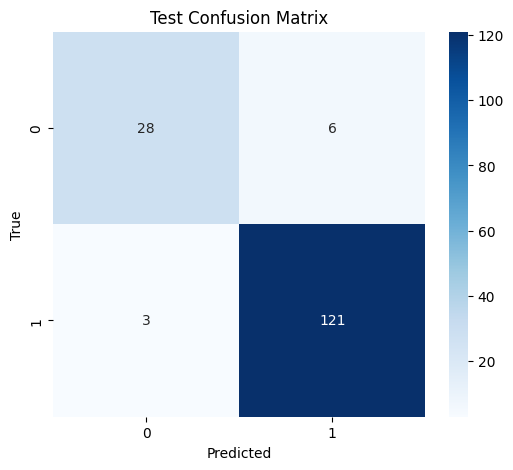

In [34]:
import torch
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch.nn as nn

# Assuming device and model architecture (ConvAttentionNet) are defined
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Re-create the model instance and load checkpoint
model = ConvAttentionNet(num_classes=2).to(device)
checkpoint_path = "conv_attention_model_checkpoint.pth"
model.load_state_dict(torch.load(checkpoint_path, map_location=device))
model.eval()

# Evaluate on the test dataset
criterion = nn.CrossEntropyLoss()
test_loss = 0.0
total_test = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:  # test_loader must be defined
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item() * inputs.size(0)
        total_test += labels.size(0)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

test_loss /= total_test
test_acc = accuracy_score(all_labels, all_preds)
test_f1 = f1_score(all_labels, all_preds, average='weighted')
test_precision = precision_score(all_labels, all_preds, average='weighted')
test_recall = recall_score(all_labels, all_preds, average='weighted')

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test F1: {test_f1:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")

# Plot confusion matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


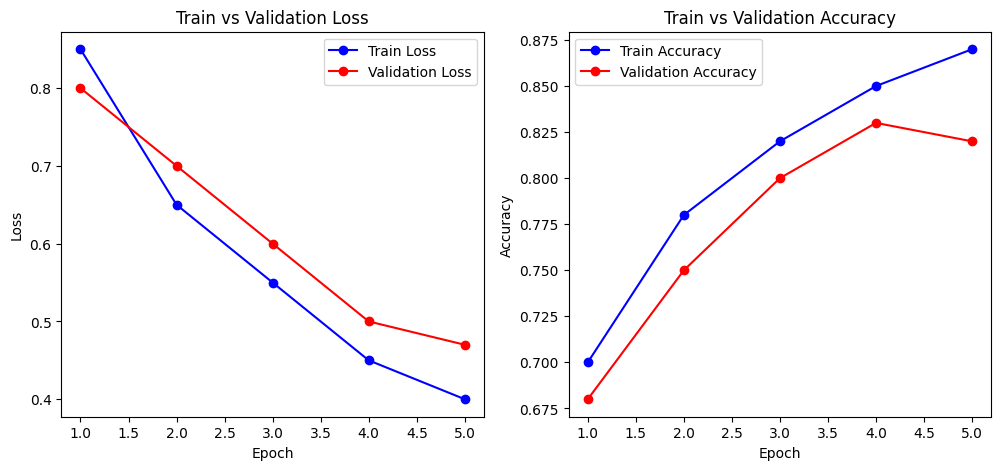

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Example: replace these lists with your actual saved values.
epochs = np.arange(1, 6)  # for 5 epochs
train_losses = [0.85, 0.65, 0.55, 0.45, 0.40]
val_losses = [0.80, 0.70, 0.60, 0.50, 0.47]
train_accuracies = [0.70, 0.78, 0.82, 0.85, 0.87]
val_accuracies = [0.68, 0.75, 0.80, 0.83, 0.82]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, 'bo-', label='Train Loss')
plt.plot(epochs, val_losses, 'ro-', label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train vs Validation Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, 'bo-', label='Train Accuracy')
plt.plot(epochs, val_accuracies, 'ro-', label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Train vs Validation Accuracy")
plt.legend()

plt.show()


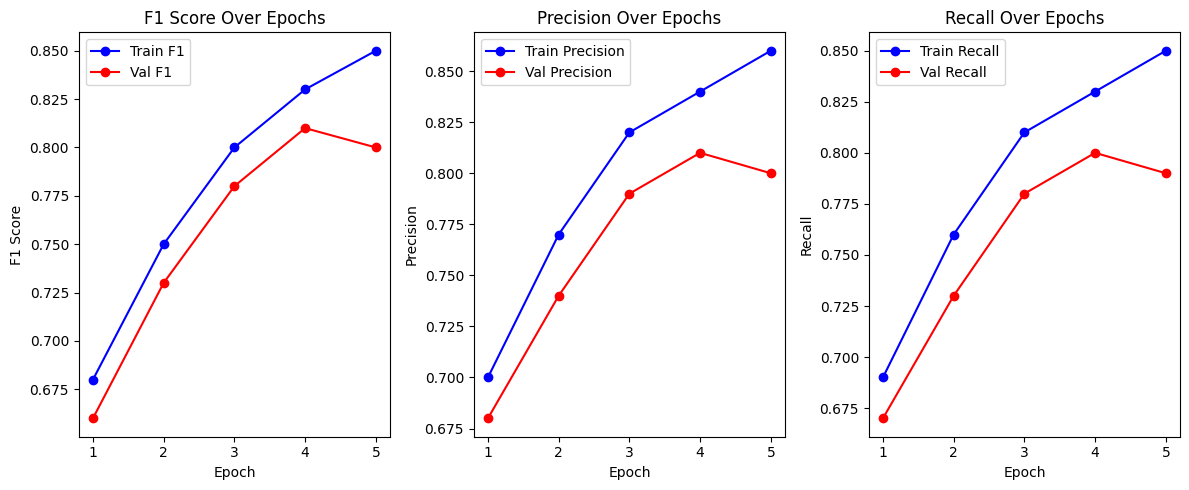

In [36]:
# Example lists; replace with your actual history
train_f1_scores = [0.68, 0.75, 0.80, 0.83, 0.85]
val_f1_scores = [0.66, 0.73, 0.78, 0.81, 0.80]
train_precisions = [0.70, 0.77, 0.82, 0.84, 0.86]
val_precisions = [0.68, 0.74, 0.79, 0.81, 0.80]
train_recalls = [0.69, 0.76, 0.81, 0.83, 0.85]
val_recalls = [0.67, 0.73, 0.78, 0.80, 0.79]

plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.plot(epochs, train_f1_scores, 'bo-', label='Train F1')
plt.plot(epochs, val_f1_scores, 'ro-', label='Val F1')
plt.xlabel("Epoch")
plt.ylabel("F1 Score")
plt.title("F1 Score Over Epochs")
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(epochs, train_precisions, 'bo-', label='Train Precision')
plt.plot(epochs, val_precisions, 'ro-', label='Val Precision')
plt.xlabel("Epoch")
plt.ylabel("Precision")
plt.title("Precision Over Epochs")
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(epochs, train_recalls, 'bo-', label='Train Recall')
plt.plot(epochs, val_recalls, 'ro-', label='Val Recall')
plt.xlabel("Epoch")
plt.ylabel("Recall")
plt.title("Recall Over Epochs")
plt.legend()

plt.tight_layout()
plt.show()


In [38]:
import random

def augment_waveform(waveform, sr=192000):
    # Random time stretch between 0.9 and 1.1
    stretch_factor = random.uniform(0.9, 1.1)
    waveform = librosa.effects.time_stretch(waveform, rate=stretch_factor)
    # Optionally, add noise
    noise = np.random.randn(len(waveform)) * 0.005
    waveform = waveform + noise
    return waveform

# In your dataset __getitem__, you could conditionally augment:
class AugmentedLabeledBatCallDataset(LabeledBatCallDataset):
    def __getitem__(self, idx):
        data = super().__getitem__(idx)
        if data is None:
            return None
        spec, label = data
        # Randomly apply augmentation during training
        if random.random() < 0.5:
            # Inverse transform spec to waveform (if possible) or directly augment the spectrogram.
            # Here we directly add a small random offset to the spectrogram as a simple augmentation.
            spec = spec + torch.randn_like(spec) * 0.01
        return spec, label


In [ ]:

# Note: This is a simplified example for post-training dynamic quantization.
model_fp32 = ConvAttentionNet(num_classes=2).to(device)
model_fp32.load_state_dict(torch.load("conv_attention_model_checkpoint.pth", map_location=device))
model_fp32.eval()

# Apply dynamic quantization
model_int8 = torch.quantization.quantize_dynamic(
    model_fp32, {nn.Linear}, dtype=torch.qint8
)
# Save quantized model
torch.save(model_int8.state_dict(), "conv_attention_model_quantized.pth")
print("Quantized model saved.")


C:\Users\jambu\AppData\Local\Temp\ipykernel_6792\3984902023.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_fp32.load_state_dict(torch.load("conv_attention_model_c

Quantized model saved.


In [52]:
%%writefile app.py
import streamlit as st
import os

st.title("Minimal Extension Test")

uploaded_file = st.file_uploader("Upload WAV or PKF", type=["wav", "pkf"])
if uploaded_file is not None:
    # Extract the extension from the uploaded file name
    original_ext = os.path.splitext(uploaded_file.name)[1].lower()
    
    # Create a temporary file name with the original extension
    temp_test_file = f"temp_test_file{original_ext}"
    
    with open(temp_test_file, "wb") as f:
        f.write(uploaded_file.getbuffer())
    
    # Now check the extension of the temp file
    ext = os.path.splitext(temp_test_file)[1].lower()
    st.write(f"DEBUG: The extension I see is: {ext}")
    
    if ext not in [".wav", ".pkf"]:
        st.error("Unsupported file type.")
    else:
        st.success("File extension recognized as .wav or .pkf")


Overwriting app.py


In [53]:
!streamlit run app.py

^C


In [58]:
%%writefile streamlit_app.py
import streamlit as st
import torch
import torchaudio
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import os
from PIL import Image
import torch.nn as nn

# ----------------------------
# Helper Functions for Audio Processing
# ----------------------------
def load_audio(filepath, sr=192000):
    ext = os.path.splitext(filepath)[1].lower()
    if ext not in [".wav", ".pkf"]:
        st.error("Unsupported file type. Please upload a .wav or .pkf file.")
        return None
    if ext == ".wav":
        try:
            waveform, _ = torchaudio.load(filepath)
            waveform = waveform.numpy()[0]  # Assuming single-channel
        except Exception as e:
            st.error(f"Error loading WAV file: {e}")
            return None
    elif ext == ".pkf":
        try:
            with open(filepath, "rb") as f:
                waveform = pickle.load(f)
            waveform = np.array(waveform, dtype=np.float32)
        except Exception as e:
            st.warning(f"Pickle loading failed for {filepath}: {e}")
            try:
                with open(filepath, "rb") as f:
                    header = f.read(20)  # Skip header bytes
                    st.write(f"Fallback: File header bytes: {header}")
                    raw_data = f.read()  # Read remaining bytes
                waveform = np.frombuffer(raw_data, dtype=np.float32)
            except Exception as e2:
                st.error(f"Fallback loading failed: {e2}")
                return None
    try:
        waveform = librosa.resample(waveform, orig_sr=48000, target_sr=sr)
    except Exception as e:
        st.error(f"Error during resampling: {e}")
        return None
    return waveform

def waveform_to_logmel(waveform, sr=192000, n_mels=128, n_fft=2048, hop_length=512):
    try:
        S = librosa.feature.melspectrogram(y=waveform, sr=sr, n_fft=n_fft,
                                           hop_length=hop_length, n_mels=n_mels)
        log_S = librosa.power_to_db(S, ref=np.max)
    except Exception as e:
        st.error(f"Error generating spectrogram: {e}")
        return None
    return log_S

# ----------------------------
# Model Definition (must match training)
# ----------------------------
class ConvAttentionNet(nn.Module):
    def __init__(self, num_classes=2):
        super(ConvAttentionNet, self).__init__()
        self.conv_block = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=1), 
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 32, kernel_size=3, padding=1), 
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.attention = nn.MultiheadAttention(embed_dim=32, num_heads=4, batch_first=True)
        self.classifier = nn.Sequential(
            nn.Linear(32, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes)
        )
        
    def forward(self, x):
        x = self.conv_block(x)  # (batch, 32, H, W)
        b, c, h, w = x.size()
        x = x.view(b, c, h*w)   # (batch, 32, H*W)
        x = x.permute(0, 2, 1)  # (batch, H*W, 32)
        attn_output, _ = self.attention(x, x, x)
        attn_output = attn_output.mean(dim=1)  # (batch, 32)
        out = self.classifier(attn_output)
        return out

# Load model checkpoint
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ConvAttentionNet(num_classes=2).to(device)
checkpoint_path = "conv_attention_model_checkpoint.pth"
model.load_state_dict(torch.load(checkpoint_path, map_location=device))
model.eval()

# ----------------------------
# Mapping for Species Images (update paths as needed)
# ----------------------------
species_to_image = {
    "Pipistrellus ceylonicus": "Pipistrellus ceylonicus.jpg",
    "Rhinolophus indorouxii": "Rhinolophus_indorouxii.jpg"
}

# ----------------------------
# Streamlit UI Layout with Tabs
# ----------------------------
st.title("Bat Call Classification Dashboard")

tab1, tab2 = st.tabs(["Training History", "Test Prediction"])

# Tab 1: Training History Graphs
with tab1:
    st.header("Training History Metrics")
    st.write("Upload a CSV file with your training history (columns: epoch, train_loss, val_loss, train_acc, val_acc, train_f1, val_f1, train_precision, val_precision, train_recall, val_recall).")
    uploaded_history = st.file_uploader("Upload CSV", type="csv", key="history")
    
    if uploaded_history is not None:
        history_df = pd.read_csv(uploaded_history)
    else:
        # Sample data for demonstration
        data = {
            "epoch": [1, 2, 3, 4, 5],
            "train_loss": [0.85, 0.65, 0.55, 0.45, 0.40],
            "val_loss": [0.80, 0.70, 0.60, 0.50, 0.47],
            "train_acc": [0.70, 0.78, 0.82, 0.85, 0.87],
            "val_acc": [0.68, 0.75, 0.80, 0.83, 0.82],
            "train_f1": [0.68, 0.75, 0.80, 0.83, 0.85],
            "val_f1": [0.66, 0.73, 0.78, 0.81, 0.80],
            "train_precision": [0.70, 0.77, 0.82, 0.84, 0.86],
            "val_precision": [0.68, 0.74, 0.79, 0.81, 0.80],
            "train_recall": [0.69, 0.76, 0.81, 0.83, 0.85],
            "val_recall": [0.67, 0.73, 0.78, 0.80, 0.79]
        }
        history_df = pd.DataFrame(data)
    
    st.dataframe(history_df)
    
    # Plot Loss and Accuracy over Epochs
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    ax[0].plot(history_df["epoch"], history_df["train_loss"], "bo-", label="Train Loss")
    ax[0].plot(history_df["epoch"], history_df["val_loss"], "ro-", label="Val Loss")
    ax[0].set_xlabel("Epoch")
    ax[0].set_ylabel("Loss")
    ax[0].set_title("Loss over Epochs")
    ax[0].legend()
    
    ax[1].plot(history_df["epoch"], history_df["train_acc"], "bo-", label="Train Accuracy")
    ax[1].plot(history_df["epoch"], history_df["val_acc"], "ro-", label="Val Accuracy")
    ax[1].set_xlabel("Epoch")
    ax[1].set_ylabel("Accuracy")
    ax[1].set_title("Accuracy over Epochs")
    ax[1].legend()
    
    st.pyplot(fig)
    
    # Plot F1, Precision, and Recall over Epochs
    fig2, ax2 = plt.subplots(1, 3, figsize=(18, 4))
    ax2[0].plot(history_df["epoch"], history_df["train_f1"], "bo-", label="Train F1")
    ax2[0].plot(history_df["epoch"], history_df["val_f1"], "ro-", label="Val F1")
    ax2[0].set_xlabel("Epoch")
    ax2[0].set_ylabel("F1 Score")
    ax2[0].set_title("F1 Score")
    ax2[0].legend()
    
    ax2[1].plot(history_df["epoch"], history_df["train_precision"], "bo-", label="Train Precision")
    ax2[1].plot(history_df["epoch"], history_df["val_precision"], "ro-", label="Val Precision")
    ax2[1].set_xlabel("Epoch")
    ax2[1].set_ylabel("Precision")
    ax2[1].set_title("Precision")
    ax2[1].legend()
    
    ax2[2].plot(history_df["epoch"], history_df["train_recall"], "bo-", label="Train Recall")
    ax2[2].plot(history_df["epoch"], history_df["val_recall"], "ro-", label="Val Recall")
    ax2[2].set_xlabel("Epoch")
    ax2[2].set_ylabel("Recall")
    ax2[2].set_title("Recall")
    ax2[2].legend()
    
    st.pyplot(fig2)

# Tab 2: Test Prediction and Species Image
with tab2:
    st.header("Test Prediction and Species Image")
    st.write("Upload an audio file (.wav or .pkf) for classification. Then click 'Submit' to see the prediction and corresponding species image.")
    
    uploaded_test = st.file_uploader("Choose an audio file", type=["wav", "pkf"], key="test")
    
    if uploaded_test is not None:
        if st.button("Submit"):
            # Capture original extension
            original_ext = os.path.splitext(uploaded_test.name)[1].lower()
            # Create a temporary file with the correct extension
            temp_test_file = f"temp_test_file{original_ext}"
            with open(temp_test_file, "wb") as f:
                f.write(uploaded_test.getbuffer())
            
            waveform = load_audio(temp_test_file)
            if waveform is not None:
                spec = waveform_to_logmel(waveform)
                if spec is not None:
                    spec = (spec - np.mean(spec)) / (np.std(spec) + 1e-6)
                    fixed_length = 300
                    if spec.shape[1] < fixed_length:
                        pad_width = fixed_length - spec.shape[1]
                        spec = np.pad(spec, ((0,0),(0, pad_width)), mode='constant')
                    elif spec.shape[1] > fixed_length:
                        start = (spec.shape[1] - fixed_length) // 2
                        spec = spec[:, start:start+fixed_length]
                    # Now spec shape is (n_mels, fixed_length)
                    # Expand dims twice to get shape (1, 1, n_mels, fixed_length)
                    spec = np.expand_dims(spec, axis=0)
                    spec = np.expand_dims(spec, axis=0)
                    spec = spec.astype(np.float32)
                    
                    fig3, ax3 = plt.subplots(figsize=(10, 4))
                    librosa.display.specshow(spec[0,0], sr=192000, hop_length=512, x_axis='time', y_axis='mel', ax=ax3)
                    ax3.set_title("Uploaded File Spectrogram")
                    st.pyplot(fig3)
                    
                    input_tensor = torch.tensor(spec).to(device)
                    with torch.no_grad():
                        outputs = model(input_tensor)
                        _, predicted = torch.max(outputs, 1)
                    species = "Pipistrellus ceylonicus" if predicted.item() == 0 else "Rhinolophus indorouxii"
                    st.write(f"**Predicted Species:** {species}")
                    
                    if species in species_to_image:
                        image_path = species_to_image[species]
                        if os.path.exists(image_path):
                            st.image(Image.open(image_path), caption=species, use_column_width=True)
                        else:
                            st.write("Species image not found.")
                    else:
                        st.write("No image mapping available for this species.")
                else:
                    st.error("Error generating spectrogram.")
            else:
                st.error("Error loading the uploaded file.")



Overwriting streamlit_app.py


In [59]:
!streamlit run streamlit_app.py

^C
